# `Pydicom` module

In [1]:
from pyhere import here
from pydicom import dcmread

# sys.path.insert(1, str(Path.cwd().parent)) 

## Read File

In [4]:
ds = dcmread(here("data/dataset1_TorsoCT/IM-0001-0001.dcm"))
ds

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 204
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.50025.30000005060811542834300000777
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002,0013) Implementation Version Name         SH: 'OSIRIX'
(0002,0016) Source Application Entity Title     AE: 'OSIRIX'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.50025.30000005060

## Metadata

You can access specific elements by their DICOM keyword or tag:

In [6]:
print(ds.PatientName) # element keyword
print(ds[0x10, 0x10].value) # element tag

patient1
patient1


In [7]:
# Accessing specific metadata fields
print("Patient Name:", ds.PatientName)
print("Patient ID:", ds.PatientID)
print("Modality:", ds.Modality)
print("Study Date:", ds.StudyDate)
print("Image Dimensions:", ds.Rows, "x", ds.Columns)

Patient Name: patient1
Patient ID: patient1_ID
Modality: CT
Study Date: 20050601
Image Dimensions: 512 x 512


In [11]:
# Loop over all DICOM metadata
for elem in ds:
    print(f"{elem.tag}: {elem.name} = {elem.value}")

(0008,0005): Specific Character Set = ISO_IR 100
(0008,0008): Image Type = ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008,0016): SOP Class UID = 1.2.840.10008.5.1.4.1.1.2
(0008,0018): SOP Instance UID = 1.3.12.2.1107.5.1.4.50025.30000005060811542834300000777
(0008,0020): Study Date = 20050601
(0008,0021): Series Date = 20050601
(0008,0022): Acquisition Date = 20050608
(0008,0023): Content Date = 20050608
(0008,0030): Study Time = 120000.000000
(0008,0031): Series Time = 120000.000000
(0008,0032): Acquisition Time = 103434.945159
(0008,0033): Content Time = 103434.945159
(0008,0050): Accession Number = 6936864
(0008,0060): Modality = CT
(0008,0070): Manufacturer = SIEMENS
(0008,0080): Institution Name = oEfZQhRfYJqw.2f0J^zIa1dx
(0008,0081): Institution Address = 
(0008,0090): Referring Physician's Name = 
(0008,1010): Station Name = 
(0008,1030): Study Description = CT Thorax Abdomen
(0008,103E): Series Description = CT_Thorax_Abdomen
(0008,1040): Institutional Department Name = 

## Pixel Data

In [16]:
import matplotlib.pyplot as plt

In [14]:
# Extract the pixel array from the DICOM dataset
pixel_array = ds.pixel_array
print(pixel_array.shape)
pixel_array

(512, 512)


array([[ 33,  13,   0, ...,  49,  69,  58],
       [ 26,  17,   0, ...,  53,  58,  47],
       [ 24,  19,   3, ...,  50,  49,  56],
       ...,
       [191, 220, 271, ..., 693, 647, 638],
       [112, 139, 178, ..., 484, 440, 433],
       [ 77,  85,  90, ..., 339, 301, 288]], dtype=uint16)

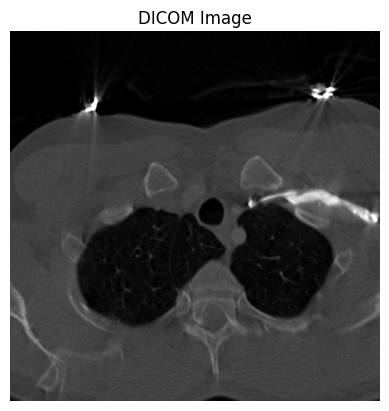

In [17]:
# Display the image using matplotlib
plt.imshow(pixel_array, cmap=plt.cm.gray)  # Set color map to grayscale
plt.title("DICOM Image")
plt.axis('off')  # Hide axis labels
plt.show()